# Fraudlent Transactions Predictions

Business Context: <br>
This case requires trainees to develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan. Data for the case is available in CSV format having 6362620 rows and 10 columns.

Candidates can use whatever method they wish to develop their machine learning model. Following usual model development procedures, the model would be estimated on the calibration data and tested on the validation data. This case requires both statistical analysis and creativity/judgment. We recommend you spend time on both fine-tuning and interpreting the results of your machine learning model.

Task to be done:
Your task is to execute the process for proactive detection of fraud while answering following questions.

1.Data cleaning including missing values, outliers and multi-collinearity.<br>
<br>
2.Describe your fraud detection model in elaboration.<br>
<br>
3.How did you select variables to be included in the model?<br>
<br>
4.Demonstrate the performance of the model by using best set of tools.<br>
<br>
5.What are the key factors that predict fraudulent customer?<br>
<br>
6.Do these factors make sense? If yes, How? If not, How not?<br>
<br>
7.What kind of prevention should be adopted while company update its infrastructure?<br>
<br>
8.Assuming these actions have been implemented, how would you determine if they work?<br>

# column Description


1.`step`: Likely represents the transaction step/time.<br>
2.`amount`: The amount of the transaction.<br>
3.`oldbalanceOrg`: Original balance of the sender before the transaction.<br>
4.`newbalanceOrig`: New balance of the sender after the transaction.<br>
5.`oldbalanceDest`: Original balance of the recipient before the transaction.<br>
6.`newbalanceDest`: New balance of the recipient after the transaction.<br>
7.`isFraud`: Indicator if the transaction is fraudulent (1 for fraud, 0 for non-fraud).<br>
8.`isFlaggedFraud`: Whether the transaction was flagged for possible fraud.<br>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("fraud.csv")

In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
df.shape

(6362620, 11)

In [6]:
df.size

69988820

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [9]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
168518,12,PAYMENT,5162.56,C366318345,0.00,0.00,M1537397001,0.00,0.00,0,0
5490109,380,CASH_IN,267871.02,C897897052,12291.00,280162.02,C964940633,987771.44,719900.42,0,0
3056863,234,CASH_OUT,383651.35,C596040789,2567.00,0.00,C900179634,306377.98,690029.33,0,0
74700,10,CASH_OUT,283317.09,C574400431,0.00,0.00,C703976121,2114589.07,2335429.66,0,0
2528999,205,PAYMENT,20691.07,C336748653,39501.54,18810.47,M969659012,0.00,0.00,0,0


In [10]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [11]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [12]:
round(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest',]].describe().T,
      2)

,count,mean,std,min,25%,50%,75%,max
step,6362620.0000,243.4000,142.3300,1.0000,156.0000,239.0000,335.0000,743.0000
amount,6362620.0000,179861.9000,603858.2300,0.0000,13389.5700,74871.9400,208721.4800,92445516.6400
oldbalanceOrg,6362620.0000,833883.1000,2888242.6700,0.0000,0.0000,14208.0000,107315.1800,59585040.3700
newbalanceOrig,6362620.0000,855113.6700,2924048.5000,0.0000,0.0000,0.0000,144258.4100,49585040.3700
oldbalanceDest,6362620.0000,1100701.6700,3399180.1100,0.0000,0.0000,132705.6600,943036.7100,356015889.3500
newbalanceDest,6362620.0000,1224996.4000,3674128.9400,0.0000,0.0000,214661.4400,1111909.2500,356179278.9200


In [13]:
df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest','isFraud',
       'isFlaggedFraud']].corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.0000,0.0224,-0.0101,-0.0103,0.0277,0.0259,0.0316,0.0033
amount,0.0224,1.0000,-0.0028,-0.0079,0.2941,0.4593,0.0767,0.0123
oldbalanceOrg,-0.0101,-0.0028,1.0000,0.9988,0.0662,0.0420,0.0102,0.0038
newbalanceOrig,-0.0103,-0.0079,0.9988,1.0000,0.0678,0.0418,-0.0081,0.0038
oldbalanceDest,0.0277,0.2941,0.0662,0.0678,1.0000,0.9766,-0.0059,-0.0005
newbalanceDest,0.0259,0.4593,0.0420,0.0418,0.9766,1.0000,0.0005,-0.0005
isFraud,0.0316,0.0767,0.0102,-0.0081,-0.0059,0.0005,1.0000,0.0441
isFlaggedFraud,0.0033,0.0123,0.0038,0.0038,-0.0005,-0.0005,0.0441,1.0000


there is MULTI_COLLINEARITY between independent features

( 'oldbalanceDest', 'newbalanceDest' ) = 0.9766

( 'oldbalanceOrg', 'newbalanceOrg') = 0.9988

Need to remove one from each of two correlation

In [14]:
df[df['amount']==0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0000,C1510987794,0.0000,0.0000,C1696624817,0.0000,0.0000,1,0
3247298,250,CASH_OUT,0.0000,C521393327,0.0000,0.0000,C480398193,0.0000,0.0000,1,0
3760289,279,CASH_OUT,0.0000,C539112012,0.0000,0.0000,C1106468520,538547.6300,538547.6300,1,0
5563714,387,CASH_OUT,0.0000,C1294472700,0.0000,0.0000,C1325541393,7970766.5700,7970766.5700,1,0
5996408,425,CASH_OUT,0.0000,C832555372,0.0000,0.0000,C1462759334,76759.9000,76759.9000,1,0
5996410,425,CASH_OUT,0.0000,C69493310,0.0000,0.0000,C719711728,2921531.3400,2921531.3400,1,0
6168500,554,CASH_OUT,0.0000,C10965156,0.0000,0.0000,C1493336195,230289.6600,230289.6600,1,0
6205440,586,CASH_OUT,0.0000,C1303719003,0.0000,0.0000,C900608348,1328472.8600,1328472.8600,1,0
6266414,617,CASH_OUT,0.0000,C1971175979,0.0000,0.0000,C1352345416,0.0000,0.0000,1,0
6281483,646,CASH_OUT,0.0000,C2060908932,0.0000,0.0000,C1587892888,0.0000,0.0000,1,0


all transactions which contains amount=0 are fraud transactions.  
it's obvious that if someone is having NIL account in their account, then their is no sense to transfer money.    

Thus most probably, fradulents are targeting random accounts, and may be they dont aware about account balance


In [15]:
df[df['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.0800,C728984460,4953893.0800,4953893.0800,C639921569,0.0000,0.0000,1,1
3247297,250,TRANSFER,1343002.0800,C1100582606,1343002.0800,1343002.0800,C1147517658,0.0000,0.0000,1,1
3760288,279,TRANSFER,536624.4100,C1035541766,536624.4100,536624.4100,C1100697970,0.0000,0.0000,1,1
5563713,387,TRANSFER,4892193.0900,C908544136,4892193.0900,4892193.0900,C891140444,0.0000,0.0000,1,1
5996407,425,TRANSFER,10000000.0000,C689608084,19585040.3700,19585040.3700,C1392803603,0.0000,0.0000,1,1
5996409,425,TRANSFER,9585040.3700,C452586515,19585040.3700,19585040.3700,C1109166882,0.0000,0.0000,1,1
6168499,554,TRANSFER,3576297.1000,C193696150,3576297.1000,3576297.1000,C484597480,0.0000,0.0000,1,1
6205439,586,TRANSFER,353874.2200,C1684585475,353874.2200,353874.2200,C1770418982,0.0000,0.0000,1,1
6266413,617,TRANSFER,2542664.2700,C786455622,2542664.2700,2542664.2700,C661958277,0.0000,0.0000,1,1
6281482,646,TRANSFER,10000000.0000,C19004745,10399045.0800,10399045.0800,C1806199534,0.0000,0.0000,1,1


All transactions which are Flag fraud are actually fraud transactions.

In [16]:
df[(df['amount']==df['oldbalanceOrg']) & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0000,C1305486145,181.0000,0.0000,C553264065,0.0000,0.0000,1,0
3,1,CASH_OUT,181.0000,C840083671,181.0000,0.0000,C38997010,21182.0000,0.0000,1,0
251,1,TRANSFER,2806.0000,C1420196421,2806.0000,0.0000,C972765878,0.0000,0.0000,1,0
252,1,CASH_OUT,2806.0000,C2101527076,2806.0000,0.0000,C1007251739,26202.0000,0.0000,1,0
680,1,TRANSFER,20128.0000,C137533655,20128.0000,0.0000,C1848415041,0.0000,0.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.1300,C786484425,339682.1300,0.0000,C776919290,0.0000,339682.1300,1,0
6362616,743,TRANSFER,6311409.2800,C1529008245,6311409.2800,0.0000,C1881841831,0.0000,0.0000,1,0
6362617,743,CASH_OUT,6311409.2800,C1162922333,6311409.2800,0.0000,C1365125890,68488.8400,6379898.1100,1,0
6362618,743,TRANSFER,850002.5200,C1685995037,850002.5200,0.0000,C2080388513,0.0000,0.0000,1,0


if 'amount'=='oldbalanceOrg', then its Fraud Transactions.<br>
It means , whenever fraudulent agents are aware about target account balance.<br>
then their motive was to transfer all account balanced to their respected destination accounts.

# Data Preprocessing

In [17]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

No null values present in dataset

In [18]:
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [19]:
df.duplicated().sum()

0

In [20]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

Need to balanced this data.

# Exploratory Data Analysis (EDA) 

In [21]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

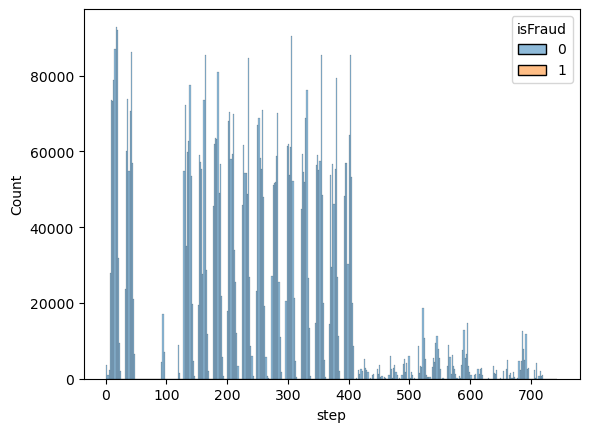

In [22]:
sns.histplot(x='step', data=df,hue='isFraud');

It is difficult to identify fraud transcation time duration,<br>
but we noticed that most of the transactions are below 400 time unit <br>
where 1 time unit = 1 hr <br>

<Axes: xlabel='amount'>

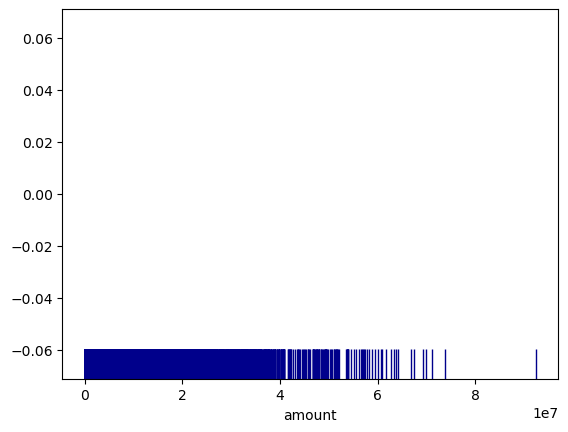

In [23]:
sns.rugplot(x='amount', data=df, height=.08, color='darkblue')

Most of the transaction amounts are small amount and <br>
very few transactions are having large amount transfer.<br>
Thus, their is higher probability that these transactions may be done by fraudulent agents.<br>

In [24]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

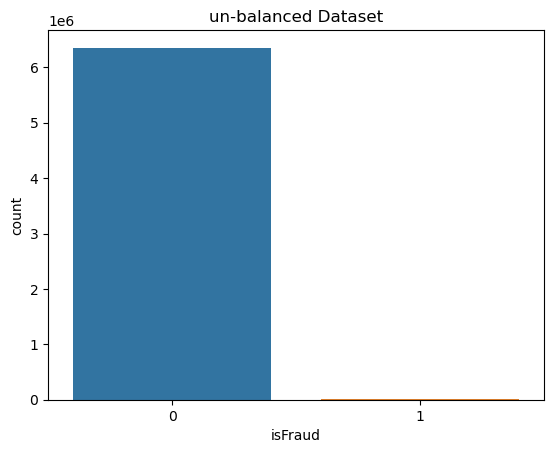

In [25]:
sns.countplot(x=df['isFraud'])
plt.title("un-balanced Dataset")
plt.show()

This histograph clearly shows that our dataset is highly Un_Balanced.<br>
Because even in real life , the ratio between fraud transc. and normal trans are one side weighted.<br>
Need to handle this , otherwise it will impact our model Training.<br>

In [26]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

C:\Users\SRIYA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

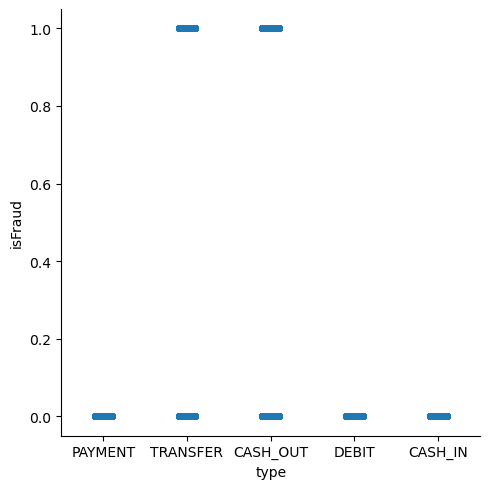

In [27]:
plt.figure(figsize=(10,6))
sns.catplot(data=df, x="type", y="isFraud")

Most of the Fraud transactions are performed on "TRANSFER" and "CASH_OUT" type.

In [28]:
df.loc[(df['type']=="CASH_OUT") & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.0000,C840083671,181.0000,0.0000,C38997010,21182.0000,0.0000,1,0
252,1,CASH_OUT,2806.0000,C2101527076,2806.0000,0.0000,C1007251739,26202.0000,0.0000,1,0
681,1,CASH_OUT,20128.0000,C1118430673,20128.0000,0.0000,C339924917,6268.0000,12145.8500,1,0
724,1,CASH_OUT,416001.3300,C749981943,0.0000,0.0000,C667346055,102.0000,9291619.6200,1,0
970,1,CASH_OUT,1277212.7700,C467632528,1277212.7700,0.0000,C716083600,0.0000,2444985.1900,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.9900,C994950684,63416.9900,0.0000,C1662241365,276433.1800,339850.1700,1,0
6362613,743,CASH_OUT,1258818.8200,C1436118706,1258818.8200,0.0000,C1240760502,503464.5000,1762283.3300,1,0
6362615,743,CASH_OUT,339682.1300,C786484425,339682.1300,0.0000,C776919290,0.0000,339682.1300,1,0
6362617,743,CASH_OUT,6311409.2800,C1162922333,6311409.2800,0.0000,C1365125890,68488.8400,6379898.1100,1,0


In [29]:
df.loc[(df['type']=="TRANSFER") & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0000,C1305486145,181.0000,0.0000,C553264065,0.0000,0.0000,1,0
251,1,TRANSFER,2806.0000,C1420196421,2806.0000,0.0000,C972765878,0.0000,0.0000,1,0
680,1,TRANSFER,20128.0000,C137533655,20128.0000,0.0000,C1848415041,0.0000,0.0000,1,0
969,1,TRANSFER,1277212.7700,C1334405552,1277212.7700,0.0000,C431687661,0.0000,0.0000,1,0
1115,1,TRANSFER,35063.6300,C1364127192,35063.6300,0.0000,C1136419747,0.0000,0.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.9900,C778071008,63416.9900,0.0000,C1812552860,0.0000,0.0000,1,0
6362612,743,TRANSFER,1258818.8200,C1531301470,1258818.8200,0.0000,C1470998563,0.0000,0.0000,1,0
6362614,743,TRANSFER,339682.1300,C2013999242,339682.1300,0.0000,C1850423904,0.0000,0.0000,1,0
6362616,743,TRANSFER,6311409.2800,C1529008245,6311409.2800,0.0000,C1881841831,0.0000,0.0000,1,0


It is clear that fraudent agents only targeted "CASH_OUT" and "TRANSFER" type of trans. becuase 100% fraud transactions are lie inside these two types.

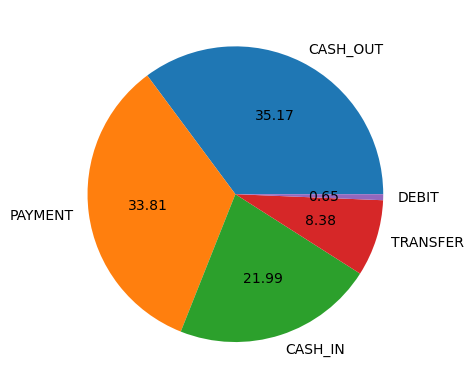

In [30]:
plt.pie(x = df['type'].value_counts(),
       autopct='%.2f',labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'])
plt.show()

Approx. 69% transactions are of type "CASH_OUT" and "PAYMENT",<br>
due to which fraudulent agents targeted these two type.

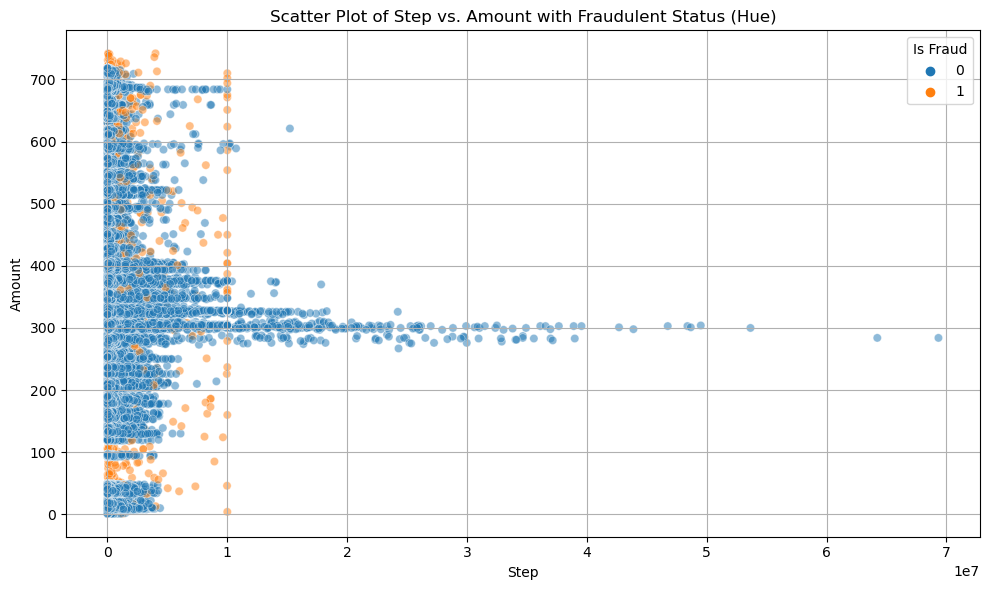

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce dataset size by sampling 10% of the data
sampled_df = df.sample(frac=0.1, random_state=42)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sampled_df, x='amount', y='step', hue='isFraud', alpha=0.5)
plt.xlabel('Step')
plt.ylabel('Amount')
plt.title('Scatter Plot of Step vs. Amount with Fraudulent Status (Hue)')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Is Fraud')
plt.show()



# Outliers Detection

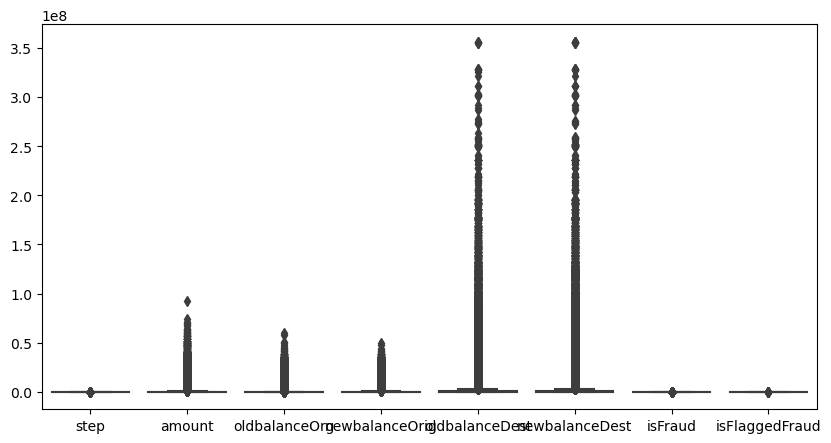

In [32]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(df)
plt.show()

In [33]:
# using iqr method in "step" feature...

per25=df['step'].quantile(0.25)
per75=df['step'].quantile(0.75)
iqr=per75-per25
up_limit=per75+(1.5*iqr)
low_limit=per25-(1.5*iqr)
print("upper limit :- ",up_limit)
print("upper limit :- ",low_limit)

upper limit :-  603.5
upper limit :-  -112.5


In [34]:
df[df["step"]>603]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6259932,604,TRANSFER,714218.4800,C454938739,714218.4800,0.0000,C482986731,0.0000,0.0000,1,0
6259933,604,CASH_OUT,714218.4800,C1835708623,714218.4800,0.0000,C1881116283,106940.8300,821159.3100,1,0
6259934,604,TRANSFER,277582.5300,C2144116571,277582.5300,0.0000,C570246252,0.0000,0.0000,1,0
6259935,604,CASH_OUT,277582.5300,C1512896686,277582.5300,0.0000,C731882373,0.0000,277582.5300,1,0
6259936,604,TRANSFER,4672401.0400,C801580496,4672401.0400,0.0000,C1917884973,0.0000,0.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.1300,C786484425,339682.1300,0.0000,C776919290,0.0000,339682.1300,1,0
6362616,743,TRANSFER,6311409.2800,C1529008245,6311409.2800,0.0000,C1881841831,0.0000,0.0000,1,0
6362617,743,CASH_OUT,6311409.2800,C1162922333,6311409.2800,0.0000,C1365125890,68488.8400,6379898.1100,1,0
6362618,743,TRANSFER,850002.5200,C1685995037,850002.5200,0.0000,C2080388513,0.0000,0.0000,1,0


There are more than 100 thousand records considered as outlier in "step" feature .<br>
we can't remove these records , because of value.<br>

and ,<br>
other independent features (numeric ) are denotes amount ( money transaction ),<br>
thus removing these column is not good option.<br>
becuase higher amount may have higher probability to denote fraud transaction.<br>

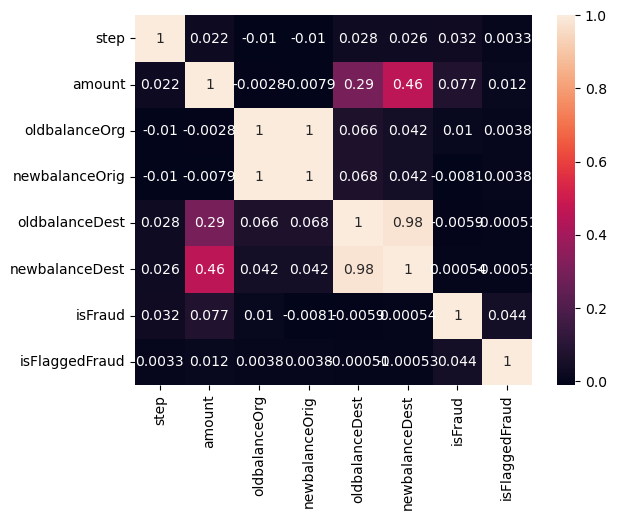

In [35]:
sns.heatmap(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest', 'isFraud','isFlaggedFraud']].corr(),
            annot=True
           )
plt.show()

1) Their is multi_collinearity between 4 independent features<br>

  ( 'oldbalanceDest', 'newbalanceDest' ) = 0.9766 <br>
  ( 'oldbalanceOrg', 'newbalanceOrig') = 0.9988 <br>
  Need to remove one from each of two correlation <br>

2) Best option is to remove 'newbalanceOrig' and 'newbalanceDest', <br>
  becuase they are less correlated with dependent feature ( "isFraud"), <br>
  as compare to other two one. <br>

In [40]:
# Import required libraries
import pandas as pd
import dask.dataframe as dd
import numpy as np

# Drop the specified columns
df_cleaned = df.drop(columns=['type', 'nameOrig', 'nameDest'])

# Convert to Dask DataFrame with multiple partitions
df_dask = dd.from_pandas(df_cleaned, npartitions=8)  # Increase partitions to manage memory

# Keep only numeric columns
df_numeric = df_dask.select_dtypes(include=[np.number])

# Calculate correlation
corr = df_numeric.corr().compute()
print(corr["isFraud"])


step              0.0316
amount            0.0767
oldbalanceOrg     0.0102
newbalanceOrig   -0.0081
oldbalanceDest   -0.0059
newbalanceDest    0.0005
isFraud           1.0000
isFlaggedFraud    0.0441
Name: isFraud, dtype: float64


# Feature selection

In [45]:
import pandas as pd

# Function to calculate correlations above a threshold
def correlation(dataset, threshold):
    # Keep only numeric columns
    dataset_numeric = dataset.select_dtypes(include=[np.number])
    
    # Calculate the correlation matrix
    corr_matrix = dataset_numeric.corr()
    
    # Set to store correlated columns
    column_corr = set()

    # Iterate through the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # Check if correlation is above the threshold
                colname = corr_matrix.columns[i]
                column_corr.add(colname)  # Add column name to set

    return column_corr

# Call the function with a threshold value of 0.9
correlated_features = correlation(df, 0.9)
print(correlated_features)


{'newbalanceDest', 'newbalanceOrig'}


In [46]:
len(set(correlated_features))

2

In [47]:
correlated_features

{'newbalanceDest', 'newbalanceOrig'}

In [48]:
df=df.drop(correlated_features,axis=1)

In [49]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.6400,C1231006815,170136.0000,M1979787155,0.0000,0,0
1,1,PAYMENT,1864.2800,C1666544295,21249.0000,M2044282225,0.0000,0,0
2,1,TRANSFER,181.0000,C1305486145,181.0000,C553264065,0.0000,1,0
3,1,CASH_OUT,181.0000,C840083671,181.0000,C38997010,21182.0000,1,0
4,1,PAYMENT,11668.1400,C2048537720,41554.0000,M1230701703,0.0000,0,0


Checking variations of data in features <br>
if variation is zero (0) , means that column ( feature ) is not <br>
having any correlation with dependent features. and we need to remove that column.<br>

In [50]:
from sklearn.feature_selection import VarianceThreshold

In [51]:
"""
threshold=0  means feature having only 1 value ( no variation)
threshold=1 means feature having 2 different values ( small variation)
etc
"""
Var_Thresh=VarianceThreshold(threshold=0)
Var_Thresh.fit(df[['step','amount','oldbalanceOrg','oldbalanceDest','isFlaggedFraud']])
Var_Thresh.get_support()

array([ True,  True,  True,  True,  True])

True :- having variations <br>
False :- not having variations <br>

In [52]:
# when threshold=1

Var_Thresh=VarianceThreshold(threshold=1)
Var_Thresh.fit(df[['step','amount','oldbalanceOrg','oldbalanceDest','isFlaggedFraud']])
Var_Thresh.get_support()

array([ True,  True,  True,  True, False])

'isFlaggedFraud' feature having Low_variation in data , <br>
but we can't remove that column, because it contain these two values (0,1) <br>
which helps to identify whether our transc. is fraud or not <br>
and , <br>

it also shows good correlationship with dependent feature ( target feature ) <br>
Thus removing this feature is not good option. <br>

In [53]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
nameDest           object
oldbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [54]:
print(" type having these unique values :- \n",df["type"].unique())
print("\n\n nameOrig having these unique values :- \n",df["nameOrig"].unique())
print("\n\n nameDest having these unique values :- \n",df["nameDest"].unique())

 type having these unique values :- 
 ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


 nameOrig having these unique values :- 
 ['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']


 nameDest having these unique values :- 
 ['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']


we have 4 unique values in "type" feature, <br>

and "nameOrig" and "nameDest" contain more unique values <br>
Lets check their count... <br>

In [55]:
df['nameOrig'].value_counts()

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64

In [56]:
df['nameDest'].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

most of the data inside "nameOrig" and "nameDest" <br>
are unique ( approx 90% and 60% ), means it will be not useful for model training .<br>
Thus, good option is to remove them.<br>

In [57]:
df = df.drop({'nameOrig', 'nameDest'}, axis=1)

In [58]:
df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.6400,170136.0000,0.0000,0,0
1,1,PAYMENT,1864.2800,21249.0000,0.0000,0,0
2,1,TRANSFER,181.0000,181.0000,0.0000,1,0
3,1,CASH_OUT,181.0000,181.0000,21182.0000,1,0
4,1,PAYMENT,11668.1400,41554.0000,0.0000,0,0


# Feature Encoding

In [60]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [61]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

We will replace large count class with bigger numeric number, <br>
so, it will helps model for batter understanding of data pattern while training

In [62]:
df['type']=df['type'].map({'CASH_OUT':5, 'PAYMENT':4,'CASH_IN':3,'TRANSFER':2,'DEBIT':1})

In [63]:
df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.6400,170136.0000,0.0000,0,0
1,1,4,1864.2800,21249.0000,0.0000,0,0
2,1,2,181.0000,181.0000,0.0000,1,0
3,1,5,181.0000,181.0000,21182.0000,1,0
4,1,4,11668.1400,41554.0000,0.0000,0,0


In [64]:
df['type'].unique()

array([4, 2, 5, 1, 3], dtype=int64)

In [65]:
df['type'].value_counts()

type
5    2237500
4    2151495
3    1399284
2     532909
1      41432
Name: count, dtype: int64

# Handling Un-Balanced Data

In [66]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [67]:
normal_transaction=df[df['isFraud']==0]
fraud_transaction=df[df['isFraud']==1]

In [68]:
normal_transaction.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.6400,170136.0000,0.0000,0,0
1,1,4,1864.2800,21249.0000,0.0000,0,0
4,1,4,11668.1400,41554.0000,0.0000,0,0
5,1,4,7817.7100,53860.0000,0.0000,0,0
6,1,4,7107.7700,183195.0000,0.0000,0,0


In [69]:
fraud_transaction.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
2,1,2,181.0000,181.0000,0.0000,1,0
3,1,5,181.0000,181.0000,21182.0000,1,0
251,1,2,2806.0000,2806.0000,0.0000,1,0
252,1,5,2806.0000,2806.0000,26202.0000,1,0
680,1,2,20128.0000,20128.0000,0.0000,1,0


In [70]:
print(normal_transaction.shape)
print(fraud_transaction.shape)

(6354407, 7)
(8213, 7)


In [71]:
normal_transaction=normal_transaction.sample(n=8213)

In [72]:
"""
Now, we have 50-50% fraud and normal transaction data.
next step is to concatenating them
"""
print(normal_transaction.shape)
print(fraud_transaction.shape)

(8213, 7)
(8213, 7)


In [73]:
normal_transaction['amount'].describe()

count       8213.0000
mean      173695.2041
std       508823.3706
min            4.6300
25%        13395.6100
50%        73914.0700
75%       204546.8600
max     15573406.9800
Name: amount, dtype: float64

mean of normal transaction is less as compare to fraud trans.

In [74]:
fraud_transaction['amount'].describe()

count       8213.0000
mean     1467967.2991
std      2404252.9472
min            0.0000
25%       127091.3300
50%       441423.4400
75%      1517771.4800
max     10000000.0000
Name: amount, dtype: float64

mean of fraud transaction is higher then normal trans.

In [75]:
# Concatenating these two dataset , to remove un-balanced dataset problem

# axis=0 means adding at rows
new_df=pd.concat([normal_transaction,fraud_transaction], axis=0)

In [76]:
new_df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
1348248,137,3,593384.4000,1713882.3100,5245480.4700,0,0
5785934,400,5,516498.1600,64.0000,43028673.1200,0,0
931086,43,4,3499.4700,0.0000,0.0000,0,0
2000089,179,4,38065.1400,38205.0000,0.0000,0,0
2094905,182,5,111493.9700,402851.5500,481628.0700,0,0


In [81]:
new_df.tail()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
6362615,743,5,339682.1300,339682.1300,0.0000,1,0
6362616,743,2,6311409.2800,6311409.2800,0.0000,1,0
6362617,743,5,6311409.2800,6311409.2800,68488.8400,1,0
6362618,743,2,850002.5200,850002.5200,0.0000,1,0
6362619,743,5,850002.5200,850002.5200,6510099.1100,1,0


NOTICED:- "Fraud_transcation" dataset added at the end of "normal_transcation" dataset

In [80]:
new_df.shape

(16426, 7)

# Train-Test Split

In [85]:
# independent features
X=new_df.drop("isFraud",axis=1)

# dependent feature
y=new_df["isFraud"]

In [87]:
X.shape

(16426, 6)

In [88]:
y.shape

(16426,)

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test=train_test_split(X , y , test_size=0.2, stratify=y , random_state=0)

In [91]:
print("x-train :- ", x_train.shape)
print("x-test :-  ",  x_test.shape)
print("y-train :- ", y_train.shape)
print("y-test :-  ",  y_test.shape)

x-train :-  (13140, 6)
x-test :-   (3286, 6)
y-train :-  (13140,)
y-test :-   (3286,)


In [92]:
y_test.value_counts()

isFraud
0    1643
1    1643
Name: count, dtype: int64

In [93]:
y_train.value_counts()

isFraud
1    6570
0    6570
Name: count, dtype: int64

Our "isFraud" values are evenly distributed amoungs training and testing data.

# Feature Scaling

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
scaler=StandardScaler()

In [96]:
scaler.fit(x_train)

StandardScaler()

In [97]:
x_train_scaler=scaler.transform(x_train)

In [99]:
x_test_scaler=scaler.transform(x_test)

In [100]:
x_train_scaler

array([[-0.58155411, -1.33993963, -0.38372625, -0.34607383, -0.23587076,
        -0.0302337 ],
       [-0.29198144, -1.33993963, -0.29825183, -0.29694791, -0.23587076,
        -0.0302337 ],
       [ 1.96254859,  0.99219072,  4.96623506,  2.72878506, -0.21937674,
        -0.0302337 ],
       ...,
       [-0.27129768, -0.56256285, -0.25368534, -0.11619761,  3.35709662,
        -0.0302337 ],
       [ 0.39575364,  0.99219072,  0.34782184,  0.07437915, -0.23587076,
        -0.0302337 ],
       [ 0.84562545,  0.99219072,  1.94523449,  0.9924827 , -0.18057866,
        -0.0302337 ]])

In [101]:
x_test_scaler

array([[-0.40057119,  0.99219072, -0.3626145 , -0.361308  , -0.18162999,
        -0.0302337 ],
       [-0.49364812,  0.99219072, -0.34709259, -0.36842451, -0.23587076,
        -0.0302337 ],
       [ 0.33370235,  0.99219072, -0.3369358 , -0.37442511, -0.14530787,
        -0.0302337 ],
       ...,
       [-1.48129774, -0.56256285, -0.43082033,  1.71261753, -0.1970936 ,
        -0.0302337 ],
       [-1.52266526,  0.21481393, -0.43785868, -0.38130276, -0.23587076,
        -0.0302337 ],
       [-1.30548577,  0.99219072, -0.39137443, -0.35046957, -0.22741943,
        -0.0302337 ]])

# Training and Evaluating model

Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
log_model=LogisticRegression()

In [104]:
log_model.fit(x_train_scaler,y_train)

LogisticRegression()

In [105]:
y_pred=log_model.predict(x_test_scaler)

In [106]:
# for accuracy check :- 

from sklearn.metrics import accuracy_score

In [107]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
77.66281192939745
- - - - - - - - - - -


Random Forest Classifier

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
rand_model=RandomForestClassifier()

In [110]:
rand_model.fit(x_train_scaler,y_train)

RandomForestClassifier()

In [111]:
y_pred=rand_model.predict(x_test_scaler)

In [112]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
98.60012172854535
- - - - - - - - - - -


Support Vector Machine (SVM)

In [113]:
from sklearn.svm import SVC

In [114]:
svm_model=SVC()

In [115]:
svm_model.fit(x_train_scaler,y_train)

SVC()

In [116]:
y_pred=svm_model.predict(x_test_scaler)

In [117]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
89.74437005477785
- - - - - - - - - - -


BernoulliNB

In [118]:
from sklearn.naive_bayes import BernoulliNB

In [119]:
bnb_model=BernoulliNB()

In [120]:
bnb_model.fit(x_train_scaler,y_train)

BernoulliNB()

In [121]:
y_pred=bnb_model.predict(x_test_scaler)

In [122]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
69.50699939135727
- - - - - - - - - - -


GaussianNB

In [123]:
from sklearn.naive_bayes import GaussianNB

In [124]:
gnb_model=GaussianNB()

In [125]:
gnb_model.fit(x_train_scaler,y_train)

GaussianNB()

In [126]:
y_pred=gnb_model.predict(x_test_scaler)

In [127]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
57.72976262933658
- - - - - - - - - - -


Conclusion <br>
Random Forest Classifier Selected

# Preparing Model for deployment

In [128]:
import pickle

In [129]:
pickle.dump(rand_model,open('model.sav','wb'))

In [130]:
#### Saving the StandadrdScaler object 'scaler'

pickle.dump(scaler,open('scaler.sav','wb'))

In [131]:
rand_model=pickle.load(open('model.sav','rb'))

In [132]:
# loading the scaler file for scaling input array
new_scaler=pickle.load(open('scaler.sav','rb'))

In [133]:
new_df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
1348248,137,3,593384.4000,1713882.3100,5245480.4700,0,0
5785934,400,5,516498.1600,64.0000,43028673.1200,0,0
931086,43,4,3499.4700,0.0000,0.0000,0,0
2000089,179,4,38065.1400,38205.0000,0.0000,0,0
2094905,182,5,111493.9700,402851.5500,481628.0700,0,0


In [134]:
# creating ndarray to pass this array as an input data
input_array=np.array([[228,5,117563.1100,0.0000,208908.4100,0]])
input_array

array([[2.2800000e+02, 5.0000000e+00, 1.1756311e+05, 0.0000000e+00,
        2.0890841e+05, 0.0000000e+00]])

In [135]:
# scaling the input_array datapoints

input_array_scale=new_scaler.transform(input_array)
input_array_scale

C:\Users\SRIYA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.40057119,  0.99219072, -0.38140482, -0.38130276, -0.17449553,
        -0.0302337 ]])

In [136]:
pred=rand_model.predict(input_array_scale)
pred

array([0], dtype=int64)

Prediction is correct :)

# Questions:

1. Data Cleaning: <br>
Missing Values: No missing data found.<br>
Outliers: Identified outliers in time data, but not removed.<br>
Multi-Collinearity: Fixed by removing correlated features.<br>
 <br>   
   
2. Fraud Detection Model:<br>
Chose Random Forest Classifier for its accuracy in detecting fraud.<br>
<br>

3. Variable Selection:<br>
Removed correlated features and those with low variations.<br>
<br>

4. Model Performance:<br>
Random Forest had the highest accuracy among tested models.<br>
<br>

5. Key Factors Predicting Fraud:<br>
High transaction amounts and flagged transactions indicate fraud.<br>
<br>

6. Reasoning for Key Factors:<br>
Large transactions and flagged ones are likely fraudulent.<br>
<br>

7. Prevention Strategies:<br>
Monitor high-value transactions and update security measures.<br>
<br>

8. Evaluating Prevention Measures:<br>
Track changes in fraud patterns and update the model.<br>